In [4]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

results=loadmat('yalefaces.mat')
X=results['X']

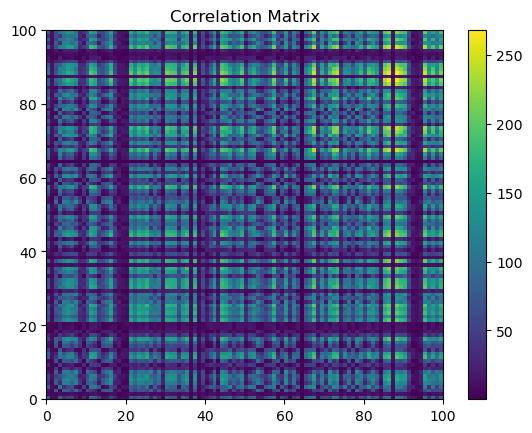

In [5]:
# (a) Compute the 100 x 100 correlation matrix C
C = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        C[i, j] = np.dot(X[:, i].T, X[:, j])

# Plot the correlation matrix using pcolor
plt.pcolor(C)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

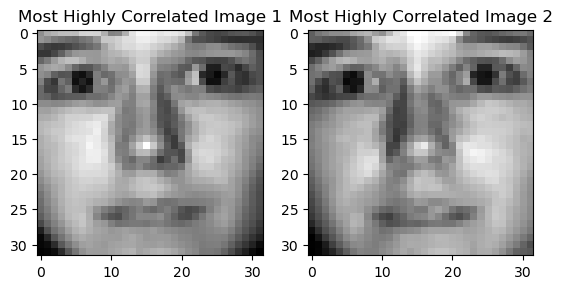

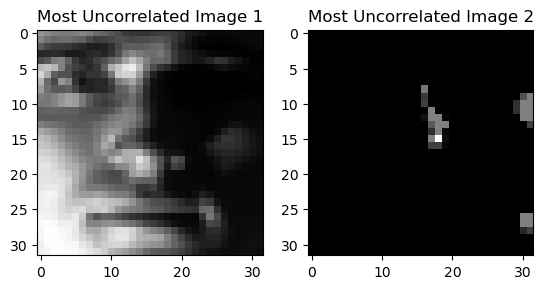

In [6]:
# (b) Find the most highly correlated and most uncorrelated images
upper_triangle_indices = np.triu_indices(100, 1)
max_corr_index = np.argmax(C[upper_triangle_indices])
min_corr_index = np.argmin(C[upper_triangle_indices])

max_corr_i, max_corr_j = upper_triangle_indices[0][max_corr_index], upper_triangle_indices[1][max_corr_index]
min_corr_i, min_corr_j = upper_triangle_indices[0][min_corr_index], upper_triangle_indices[1][min_corr_index]

# Plot the most highly correlated images
plt.figure()
plt.subplot(121)
plt.imshow(X[:, max_corr_i].reshape(32, 32), cmap='gray')
plt.title('Most Highly Correlated Image 1')
plt.subplot(122)
plt.imshow(X[:, max_corr_j].reshape(32, 32), cmap='gray')
plt.title('Most Highly Correlated Image 2')
plt.show()

# Plot the most uncorrelated images
plt.figure()
plt.subplot(121)
plt.imshow(X[:, min_corr_i].reshape(32, 32), cmap='gray')
plt.title('Most Uncorrelated Image 1')
plt.subplot(122)
plt.imshow(X[:, min_corr_j].reshape(32, 32), cmap='gray')
plt.title('Most Uncorrelated Image 2')
plt.show()

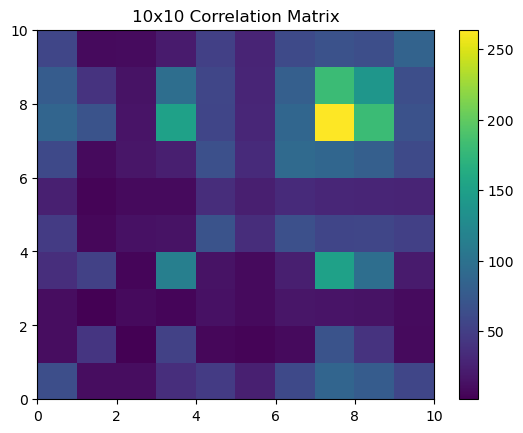

In [7]:
# (c) Compute the 10 x 10 correlation matrix C for the specified images
selected_images = [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]  # Subtract 1 to adjust for Python's 0-based indexing
C = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        C[i, j] = np.dot(X[:, selected_images[i]].T, X[:, selected_images[j]])

# Plot the correlation matrix using pcolor
plt.pcolor(C)
plt.colorbar()
plt.title('10x10 Correlation Matrix')
plt.show()

In [11]:
from numpy.linalg import eig, norm
from scipy.linalg import svd

# (d) Create the matrix Y = XX^T and find the first six eigenvectors with the largest magnitude eigenvalue
Y = np.dot(X, X.T)
eigenvalues, eigenvectors = eig(Y)
sorted_indices = np.argsort(eigenvalues)[::-1]

first_six_eigenvectors = eigenvectors[:, sorted_indices[:6]]

In [12]:
# (e) SVD the matrix X and find the first six principal component directions
U, S, Vt = svd(X, full_matrices=False)
first_six_principal_components = U[:, :6]

# Print the first six eigenvectors and the first six principal component directions
print("First six eigenvectors with the largest magnitude eigenvalue:")
print(first_six_eigenvectors)
print("\nFirst six principal component directions:")
print(first_six_principal_components)

First six eigenvectors with the largest magnitude eigenvalue:
[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]

First six principal component directions:
[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.057574

In [13]:
# (f) Compare the first eigenvector v1 from (d) with the first SVD mode u1 from (e) and compute the
# norm of difference of their absolute values
v1 = first_six_eigenvectors[:, 0]
u1 = first_six_principal_components[:, 0]

norm_diff = norm(np.abs(v1) - np.abs(u1))
print("Norm of difference of absolute values of the first eigenvector and the first SVD mode:", norm_diff)


Norm of difference of absolute values of the first eigenvector and the first SVD mode: 9.640038007624114e-16



Percentage of variance captured by each of the first 6 SVD modes:
[72.92756747 15.28176266  2.56674494  1.87752485  0.63930584  0.59243144]


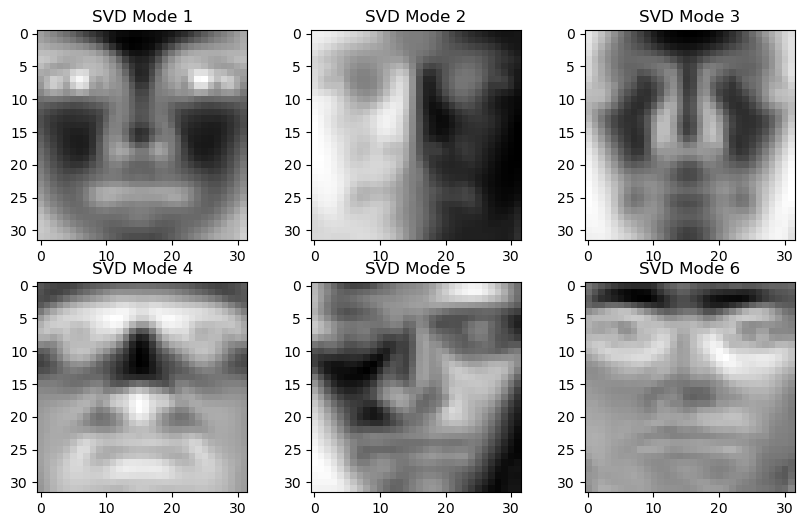

In [14]:
# (g) Compute the percentage of variance captured by each of the first 6 SVD modes
total_variance = np.sum(S ** 2)
percentage_variance = (S[:6] ** 2) / total_variance * 100
print("\nPercentage of variance captured by each of the first 6 SVD modes:")
print(percentage_variance)

# Plot the first 6 SVD modes
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(U[:, i].reshape(32, 32), cmap='gray')
    plt.title(f'SVD Mode {i+1}')
plt.show()